# Analyzing gun law impact on crime trends.

**Introduction**

In the realm of criminological research, understanding crime trends and their multifaceted determinants is crucial for developing effective strategies and policies. In our prior project (Project 1), we delved into the analysis of crime trends, unraveling patterns and insights that contribute to our comprehension of the complex dynamics at play. Building upon this foundation, our current research aims to extend our inquiry to the influence of gun laws on crime rates.

While Project 1 shed light on overarching crime trends, we recognize that a comprehensive understanding requires a more nuanced exploration of specific factors. In this sequel, we focus our attention on the impact of gun laws, acknowledging the significance of firearms regulations in shaping the landscape of criminal activity. This investigation, however, is part of a broader endeavor to merge and analyze various datasets, ensuring a holistic examination of the intricate interplay between different variables and crime rates. As we embark on this journey, we anticipate uncovering valuable insights that contribute to the ongoing discourse on crime prevention and public safety.

**Data Cleaning/Loading**

In [2]:
import bq_helper
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np
from matplotlib.pyplot import figure
from bq_helper import BigQueryHelper
import pandas as pd

# https://www.kaggle.com/sohier/introduction-to-the-bq-helper-package
chicago_crime = bq_helper.BigQueryHelper(active_project="bigquery-public-data",
                                   dataset_name="chicago_crime")


In [3]:
bq_assistant = BigQueryHelper("bigquery-public-data", "chicago_crime")
bq_assistant.list_tables()

['crime']

In [4]:
bq_assistant.head("crime", num_rows=3)

,unique_key,case_number,date,block,iucr,primary_type,description,location_description,arrest,domestic,beat,district,ward,community_area,fbi_code,x_coordinate,y_coordinate,year,updated_on,latitude,longitude,location
0,11255648,JB184373,2017-04-04 12:00:00+00:00,003XX N MICHIGAN AVE,0266,CRIM SEXUAL ASSAULT,PREDATORY,HOTEL/MOTEL,False,False,111,1,42,32,02,NaN,NaN,2017,2018-03-14 03:54:52+00:00,NaN,NaN,None
1,9760139,HX410096,2014-08-30 07:00:00+00:00,001XX N MICHIGAN AVE,0281,CRIM SEXUAL ASSAULT,NON-AGGRAVATED,RESIDENCE,False,False,111,1,42,32,02,1177276.0,1901405.0,2014,2018-02-10 03:50:01+00:00,41.884791,-87.624469,"(41.884790951, -87.624469241)"
2,12848248,JF420172,2022-10-02 12:00:00+00:00,0000X W RIVERWALK S,0281,CRIMINAL SEXUAL ASSAULT,NON-AGGRAVATED,LAKEFRONT / WATERFRONT / RIVERBANK,False,False,111,1,42,32,02,1176161.0,1902223.0,2022,2023-01-03 03:40:27+00:00,41.887061,-87.628539,"(41.887060789, -87.62853897)"


**Summary Statistics Tables**

In [5]:
query_summary_year = """SELECT year,
                COUNT(*) AS Incidents,
            FROM `bigquery-public-data.chicago_crime.crime`
            GROUP BY year
            ORDER BY year"""

response_summary_year = chicago_crime.query_to_pandas_safe(query_summary_year)

# Display summary statistics for the 'Incidents' variable
summary_stats_year = response_summary_year['Incidents'].describe()

# Print the summary statistics
print(summary_stats_year)

count        24.000000
mean     332828.375000
std      116308.866706
min       13194.000000
25%      263969.750000
50%      321942.500000
75%      439863.250000
max      486813.000000
Name: Incidents, dtype: float64


In [6]:
query_summary_primary_type = """SELECT primary_type,
                COUNT(*) AS Incidents,
            FROM `bigquery-public-data.chicago_crime.crime`
            GROUP BY primary_type
            ORDER BY primary_type"""

response_summary_primary_type = chicago_crime.query_to_pandas_safe(query_summary_primary_type)

# Display summary statistics for the 'Incidents' variable
summary_stats_primary_type = response_summary_primary_type.describe()


# Display counts for each unique 'primary_type'
counts_by_primary_type = response_summary_primary_type['Incidents'].value_counts().reset_index(name='Counts')

# Print the counts
print(counts_by_primary_type)

      index  Counts
0    495740       1
1     15035       1
2     31846       1
3     13658       1
4        24       1
5       149       1
6    301223       1
7      5201       1
8      1232       1
9     18830       1
10    69965       1
11      844       1
12   112956       1
13        9       1
14      199       1
15   358533       1
16    27536       1
17     7328       1
18    57203       1
19     4840       1
20  1687073       1
21   910458       1
22      184       1
23     8118       1
24   430068       1
25    13043       1
26    52976       1
27   217837       1
28   751732       1
29   396980       1
30      106       1
31  1457384       1
32    14631       1
33       38       1
34   524901       1
35        1       1


In [7]:
query_summary_district = """SELECT district,
                COUNT(*) AS Incidents,
            FROM `bigquery-public-data.chicago_crime.crime`
            GROUP BY district
            ORDER BY district"""

response_summary_district = chicago_crime.query_to_pandas_safe(query_summary_district)

# Display summary statistics for the 'Incidents' variable
summary_stats_district = response_summary_district['Incidents'].describe()

# Print the summary statistics
print(summary_stats_district)

count        25.00000
mean     319515.24000
std      150794.89493
min           4.00000
25%      261318.00000
50%      353154.00000
75%      404926.00000
max      536332.00000
Name: Incidents, dtype: float64


**Plots, Histograms, Figures**

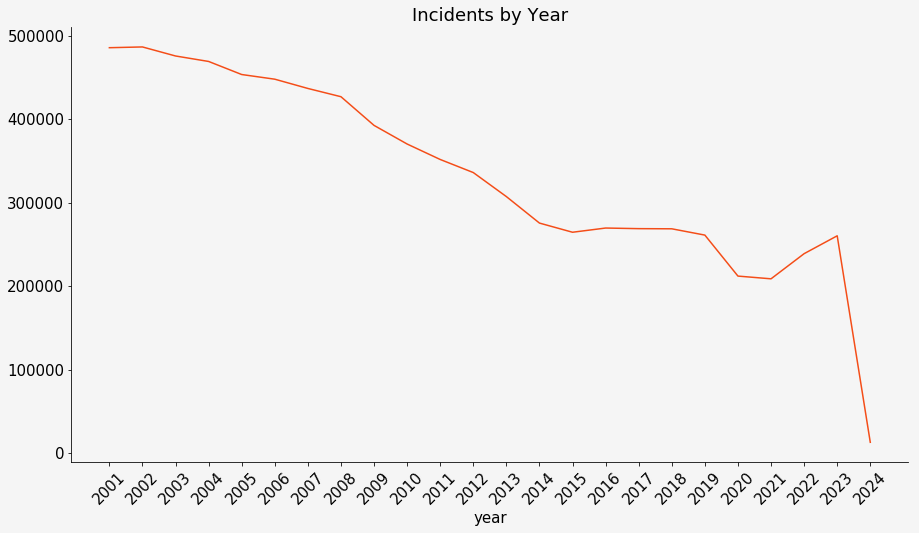

In [48]:
query_all_year = """SELECT year,
                COUNT(*) AS Incidents,
            FROM `bigquery-public-data.chicago_crime.crime`
            GROUP BY year
            ORDER BY year"""
# Run query and store in pandas df
response_all_year = chicago_crime.query_to_pandas_safe(query_all_year)

# Set plot size and text size
fig_year, ax_year = plt.subplots(figsize=(15, 8))
plt.rcParams['font.size'] = 15

response_all_year.plot(
    kind="line", x="year", y="Incidents",
    color=(244/255, 77/255, 24/255), legend=False, ax=ax_year
)

ax_year.set_facecolor((0.96, 0.96, 0.96))
fig_year.set_facecolor((0.96, 0.96, 0.96))
ax_year.spines['right'].set_visible(False)
ax_year.spines['top'].set_visible(False)
ax_year.set_title("Incidents by Year")

# Set ticks on the x-axis to show every year
plt.xticks(response_all_year['year'], rotation)

plt.show()

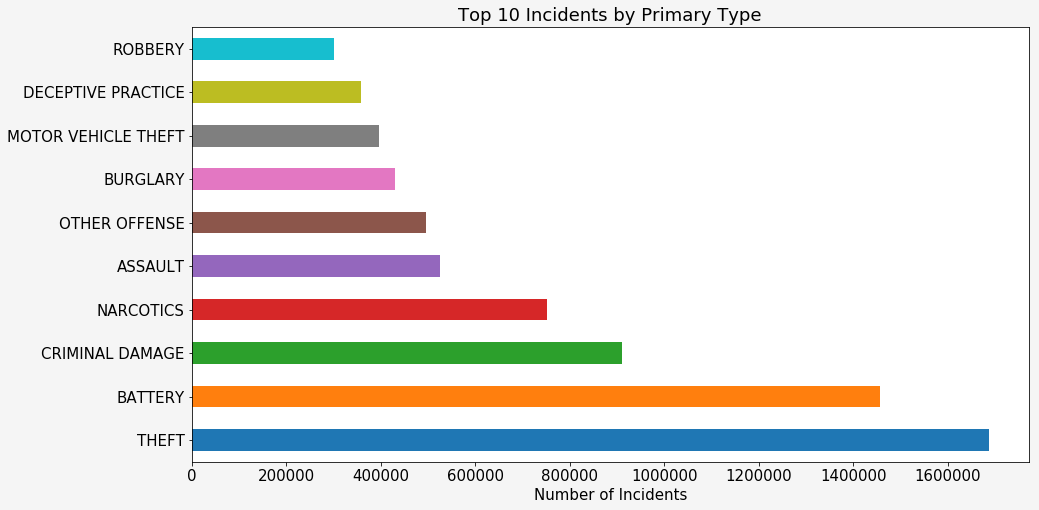

In [12]:
query_all_type = """SELECT primary_type,
                COUNT(*) AS Incidents
            FROM `bigquery-public-data.chicago_crime.crime`
            GROUP BY primary_type
            ORDER BY primary_type"""

# Sort the DataFrame by Incidents in descending order
response_all_type_sorted = chicago_crime.query_to_pandas_safe(query_all_type).sort_values(by='Incidents', ascending=False)

# Select the top 10 primary types
top_10_types = response_all_type_sorted.head(10)

# Set plot size and text size
fig_type, ax_type = plt.subplots(figsize=(15, 8))
plt.rcParams['font.size'] = 15

# Create horizontal bar chart for the top 10 primary types with names
top_10_types.plot(kind="barh", y="Incidents", ax=ax_type, legend=False)
ax_type.set_yticklabels(top_10_types['primary_type'])
ax_type.set_title("Top 10 Incidents by Primary Type")
ax_type.set_xlabel("Number of Incidents")

fig_type.set_facecolor((0.96, 0.96, 0.96))
plt.show()



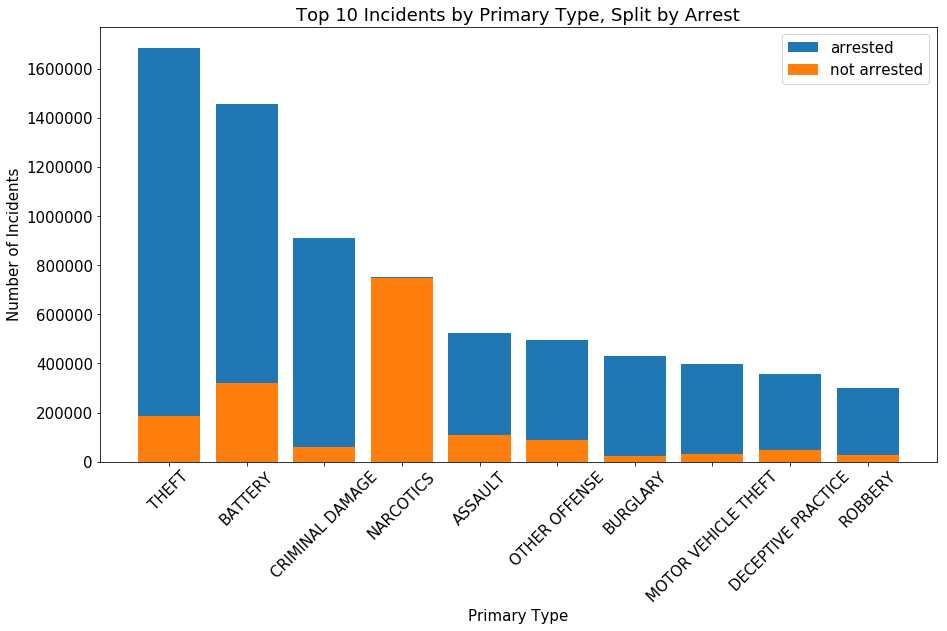

In [55]:
# SQL query to retrieve primary_type, arrest, and count of incidents
query_arrest_by_type = """
    SELECT primary_type,
           COUNT(*) AS Incidents,
           COUNTIF(arrest = TRUE) AS Arrests,
           COUNTIF(arrest = TRUE) / COUNT(*) AS Pct_Arrested
    FROM `bigquery-public-data.chicago_crime.crime`
    GROUP BY primary_type
    ORDER BY primary_type
"""

# Run the query and store the result in a DataFrame
response_arrest_by_type = chicago_crime.query_to_pandas_safe(query_arrest_by_type).sort_values(by='Incidents', ascending=False).head(10)

# Plot the data with separate sections for 'Arrest' and 'Not Arrested' within each bar
fig_arrest_by_type, ax_arrest_by_type = plt.subplots(figsize=(15, 8))

ax_arrest_by_type.set_title("Top 10 Incidents by Primary Type, Split by Arrest")
ax_arrest_by_type.set_xlabel('Primary Type')
ax_arrest_by_type.set_ylabel("Number of Incidents")
ax_arrest_by_type.bar(x=response_arrest_by_type['primary_type'], height=response_arrest_by_type['Incidents'], label="Incidents")
ax_arrest_by_type.bar(x=response_arrest_by_type['primary_type'], height=response_arrest_by_type['Arrests'], label="Arrests")

# Add legend
ax_arrest_by_type.legend(['arrested', 'not arrested'])

# Rotate x-axis labels
ax_arrest_by_type.set_xticklabels(response_arrest_by_type['primary_type'], rotation=45)

plt.show()

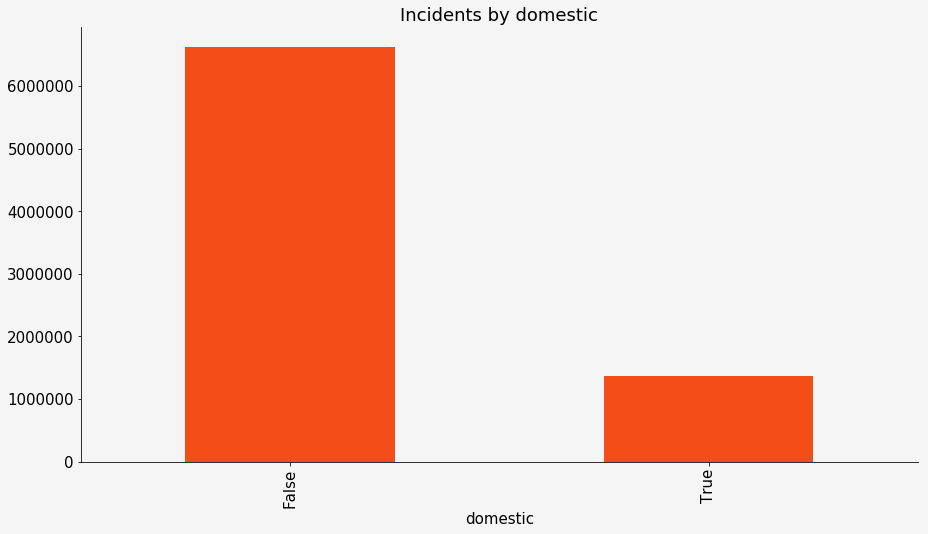

In [35]:
query_all_domestic = """SELECT domestic,
                COUNT(*) AS Incidents,
            FROM `bigquery-public-data.chicago_crime.crime`
            GROUP BY domestic
            ORDER BY domestic"""
# Run query and store in pandas df
response_all_domestic = chicago_crime.query_to_pandas_safe(query_all_domestic)

# Set plot size and text size
fig_domestic, ax_domestic = plt.subplots(figsize=(15, 8))
plt.rcParams['font.size'] = 15

response_all_domestic.plot(
    kind="bar", x="domestic", y="Incidents",
    color=(244/255, 77/255, 24/255), legend=False, ax=ax_domestic
)

ax_domestic.set_facecolor((0.96, 0.96, 0.96))
fig_domestic.set_facecolor((0.96, 0.96, 0.96))
ax_domestic.spines['right'].set_visible(False)
ax_domestic.spines['top'].set_visible(False)
ax_domestic.set_title("Incidents by domestic")

plt.show()

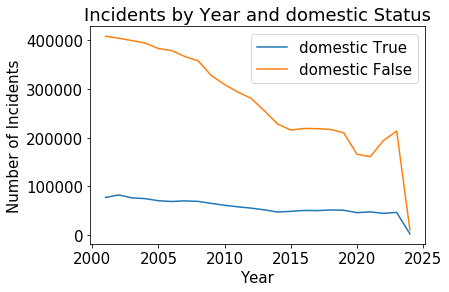

In [36]:
query_year_domestic = """
    SELECT year,
           COUNT(*) AS Incidents,
           COUNTIF(domestic = TRUE) AS domestic_True,
           COUNTIF(domestic = FALSE) AS domestic_False
    FROM `bigquery-public-data.chicago_crime.crime`
    GROUP BY year
    ORDER BY year
"""

# Run the query and store the result in a Pandas DataFrame
df_domestic = chicago_crime.query_to_pandas_safe(query_year_domestic)

# Plotting
fig_year_domestic, ax_year_domestic = plt.subplots()


ax_year_domestic.plot(df_domestic['year'], df_domestic['domestic_True'], label='domestic True')
ax_year_domestic.plot(df_domestic['year'], df_domestic['domestic_False'], label='domestic False')

# Add labels and title
ax_year_domestic.set_xlabel('Year')
ax_year_domestic.set_ylabel('Number of Incidents')
ax_year_domestic.set_title('Incidents by Year and domestic Status')
ax_year_domestic.legend()

# Show the plot
plt.show()


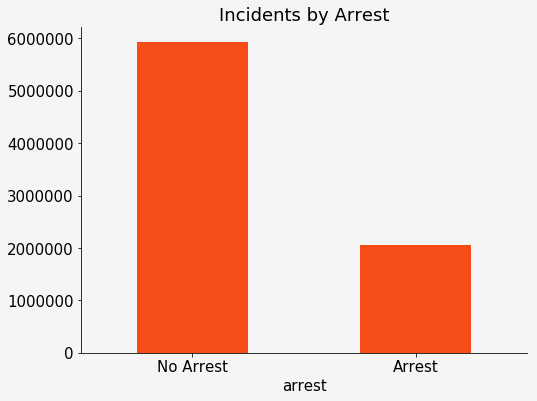

In [37]:
# Write a SQL query to count incidents grouped by arrest
query_arrest = """
    SELECT arrest,
           COUNT(*) AS Incidents
    FROM `bigquery-public-data.chicago_crime.crime`
    GROUP BY arrest
    ORDER BY arrest
"""

# Run the query and store the result in a Pandas DataFrame
result_arrest = chicago_crime.query_to_pandas_safe(query_arrest)

# Set plot size and text size
fig_arrest, ax_arrest = plt.subplots(figsize=(8, 6))
plt.rcParams['font.size'] = 15

# Create a bar plot for incidents by arrest
result_arrest.plot(kind="bar", x="arrest", y="Incidents", color=(244/255, 77/255, 24/255), legend=False, ax=ax_arrest)

ax_arrest.set_facecolor((0.96, 0.96, 0.96))
fig_arrest.set_facecolor((0.96, 0.96, 0.96))
ax_arrest.spines['right'].set_visible(False)
ax_arrest.spines['top'].set_visible(False)
ax_arrest.set_title("Incidents by Arrest")

# Customize x-axis labels for better readability
ax_arrest.set_xticklabels(["No Arrest", "Arrest"], rotation=0)

plt.show()



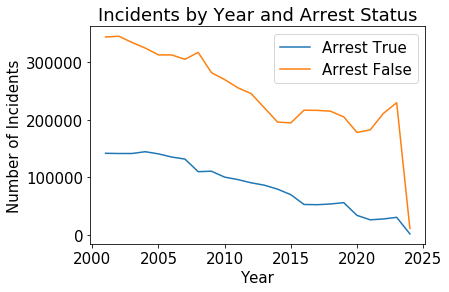

In [38]:
query_year_arrest = """
    SELECT year,
           COUNT(*) AS Incidents,
           COUNTIF(arrest = TRUE) AS Arrest_True,
           COUNTIF(arrest = FALSE) AS Arrest_False
    FROM `bigquery-public-data.chicago_crime.crime`
    GROUP BY year
    ORDER BY year
"""

# Run the query and store the result in a Pandas DataFrame
df_arrest = chicago_crime.query_to_pandas_safe(query_year_arrest)

# Plotting
fig_arrest_year, ax_arrest_year = plt.subplots()

# Plot the lines for Arrest True and Arrest False
ax_arrest_year.plot(df_arrest['year'], df_arrest['Arrest_True'], label='Arrest True')
ax_arrest_year.plot(df_arrest['year'], df_arrest['Arrest_False'], label='Arrest False')

# Add labels and title
ax_arrest_year.set_xlabel('Year')
ax_arrest_year.set_ylabel('Number of Incidents')
ax_arrest_year.set_title('Incidents by Year and Arrest Status')
ax_arrest_year.legend()

# Show the plot
plt.show()


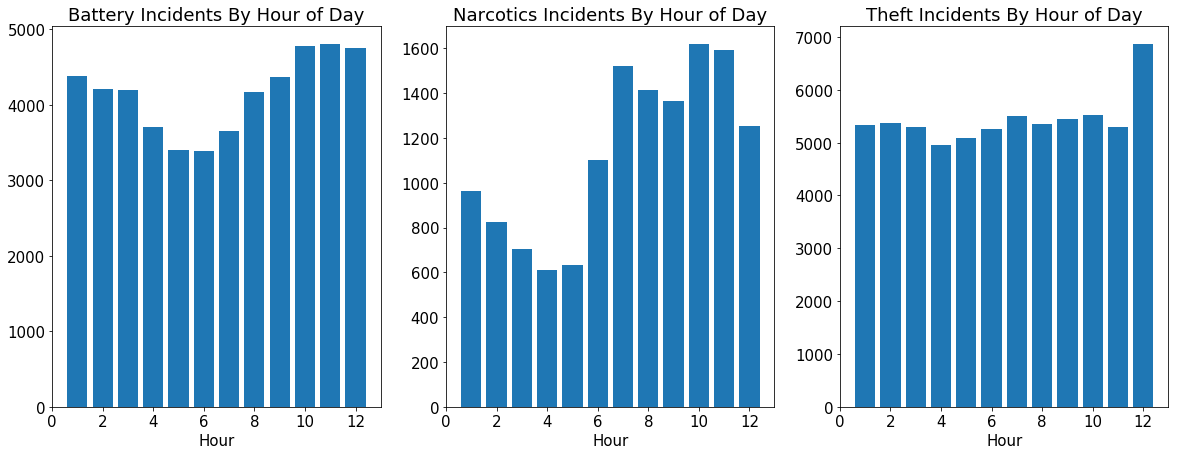

In [46]:
# Query to get count of incidents of type battery, narcotics, and theft by hour of day
query_hour_type = """SELECT EXTRACT(HOUR FROM date)  AS Hour,
                        COUNTIF(year = 2018 AND primary_type = 'BATTERY') AS Count_Battery,
                        COUNTIF(year = 2018 AND primary_type = 'NARCOTICS') AS Count_Narcotics,
                        COUNTIF(year = 2018 AND primary_type = 'THEFT') AS Count_Theft
                FROM `bigquery-public-data.chicago_crime.crime`
                GROUP BY Hour
                ORDER BY Hour"""
hour_type = chicago_crime.query_to_pandas_safe(query_hour_type)

# Set plot figure size
fig = plt.figure(figsize = (20, 7))

# Create subplots for each type of incident

ax = fig.add_subplot(131)
ax.bar(hour_type.Hour, hour_type.Count_Battery)
ax.set_title('Battery Incidents By Hour of Day')
plt.xlabel('Hour')

ax2 = fig.add_subplot(132)
ax2.bar(hour_type.Hour, hour_type.Count_Narcotics)
ax2.set_title('Narcotics Incidents By Hour of Day')
plt.xlabel('Hour')

ax3 = fig.add_subplot(133)
ax3.bar(hour_type.Hour, hour_type.Count_Theft)
ax3.set_title('Theft Incidents By Hour of Day')
plt.xlabel('Hour')

plt.show()

**Conclusion**

in conclusion...